In [ ]:
Depois de um pouco mais de uma semana de estudo intenso sobre python mais voltado para a área de dados e finanças, consigo sentir confiaça para desenvolver um projeto de analise. Resolvi fazer um exercício analisando possiveis retornos gerados a partir de Drawdowns do ibovespa.

O termo "drawdown" é frequentemente usado em finanças e investimentos e se refere à redução no valor de um investimento ou portfólio em relação ao seu pico anterior. Em outras palavras, é a perda máxima que um investimento experimenta antes de se recuperar ou antes de ser encerrado.

Identificar e entender o drawdown é importante para os investidores, pois ajuda a avaliar o risco de um investimento ou portfólio e a tomar decisões informadas sobre a gestão de riscos. 

O grafico abaixo apresenta em azul os valores da cotação analisada em uma serie temporal, e em verde é representação dos valores máximo históricos.

[*********************100%%**********************]  1 of 1 completed


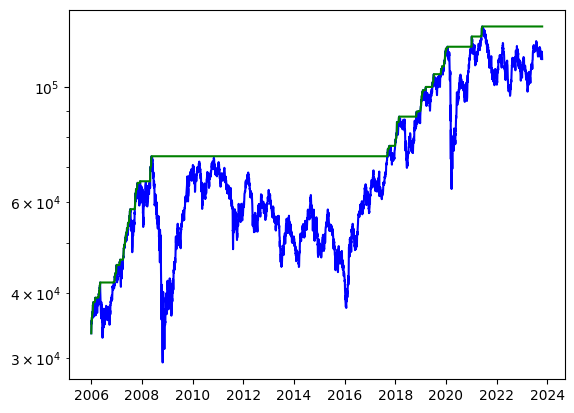

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

acao = '^BVSP'
cotacoes = yf.download(acao, '2006-01-01')['Adj Close'].to_frame()
cotacoes['cummax_total'] = cotacoes['Adj Close'].cummax()
cotacoes['quedas_total'] = ((cotacoes['Adj Close'] - cotacoes['cummax_total']) / cotacoes['cummax_total']) * 100

fig, ax = plt.subplots()
ax.plot(cotacoes.index, cotacoes['Adj Close'], color = 'b')
ax.plot(cotacoes['cummax_total'], color = 'g')

# inserir um grafico com 'log' e outro sem
ax.set_yscale('log')
# ax.plot(cotacoes['Adj Close'])

<Axes: xlabel='Date'>

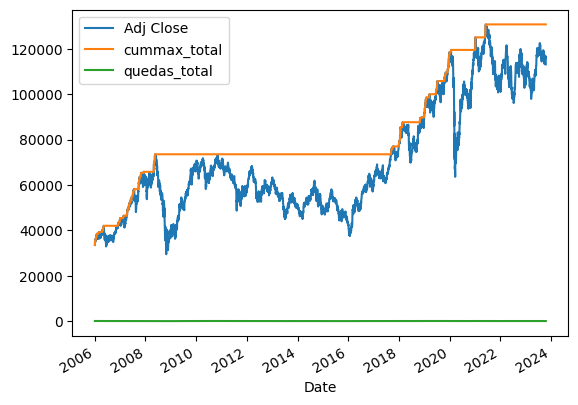

In [3]:
fig, ax = plt.subplots()
ax.grid(True)
ax.set_yscale('log')

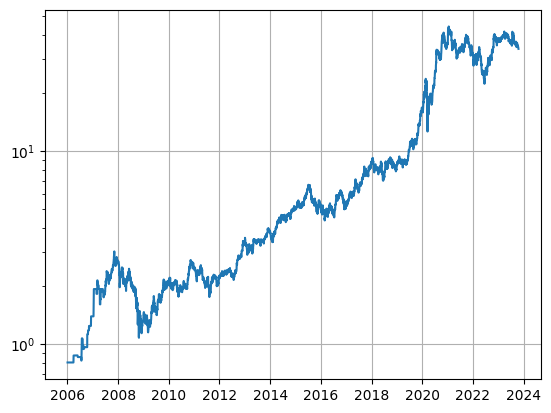

In [172]:
fig, ax = plt.subplots()
ax.plot(cotacoes['Adj Close'])
ax.grid(True)
ax.set_yscale('log')

In [173]:
cotacoes['cummax_total'] = cotacoes['Adj Close'].cummax()
cotacoes['quedas_total'] = ((cotacoes['Adj Close'] - cotacoes['cummax_total']) / cotacoes['cummax_total']) * 100

# cotacoes['quedas_total'] = cotacoes['quedas_total'] / cotacoes['cummax_total']
# cotacoes['quedas_total'] = cotacoes['quedas_total'] *100


cotacoes[['Adj Close', "cummax_ano",'quedas_total']]

,Adj Close,cummax_ano,quedas_total
Date,,,
2006-01-02,0.803308,0.803308,0.000000
2006-01-03,0.803308,0.803308,0.000000
2006-01-04,0.803308,0.803308,0.000000
2006-01-05,0.803308,0.803308,0.000000
2006-01-06,0.803308,0.803308,0.000000
...,...,...,...
2023-10-16,34.650002,41.565277,-21.525140
2023-10-17,34.279999,41.565277,-22.363118
2023-10-18,34.290001,41.565277,-22.340465


[-64.28980706624677, -48.217355299685074, -32.14490353312338, -16.07245176656169]
[-64.28980706624677, -48.217355299685074, -32.14490353312338, -16.07245176656169, 11.038567543029785, 22.07713508605957, 33.115702629089355, 44.15427017211914]


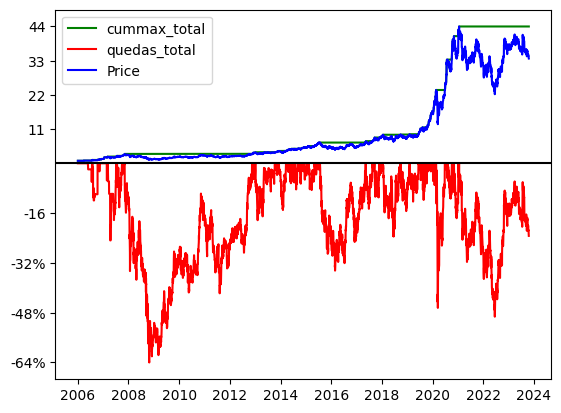

In [174]:
fig, ax = plt.subplots()
ax.plot(cotacoes['cummax_total'], label = "cummax_total", color='green')
ax.plot(cotacoes['quedas_total'], label = "quedas_total", color='red')
ax.plot(cotacoes['Adj Close'], label = "Price", color='blue')

y_max_cot = cotacoes['Adj Close'].max()
y_min_quedas = cotacoes['quedas_total'].min()
y_pct_scale = [(y_min_quedas / 4) * (i+1) for i in range(4) ]
y_cot_scale = [(y_max_cot / 4) * (i+1) for i in range(4) ]
y_scale = sorted(y_pct_scale + y_cot_scale )

y_scale_label =  [str(int(y)) + '%' for y in y_scale[:3]] + [int(y) for y in y_scale[3:]]
print(sorted(y_pct_scale))
print(sorted(y_scale))



ax.legend()
ax.axhline(y = 0, color = 'black')
# ax.set_yscale('log')
ax.yaxis.set_ticks(y_scale, y_scale_label)

# print(cotacoes)

[-64.28980706624677, -48.217355299685074, -32.14490353312338, -16.07245176656169]
[-64.28980706624677, -48.217355299685074, -32.14490353312338, -16.07245176656169, 0.6694241166114807, 1.3388482332229614, 2.008272349834442, 2.677696466445923]


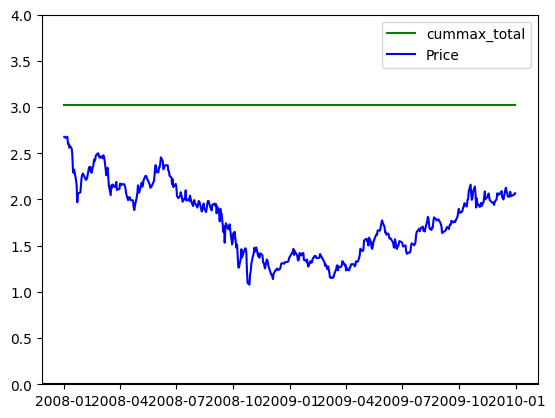

In [175]:
cotacoes_range = cotacoes[(cotacoes.index > '2008-01-01') & (cotacoes.index < '2010-01-01') ]
fig, ax = plt.subplots()
ax.plot(cotacoes_range['cummax_total'], label = "cummax_total", color='green')
# ax.plot(cotacoes_range['quedas_total'], label = "quedas_total")
ax.plot(cotacoes_range['Adj Close'], label = "Price", color= 'blue')

y_max_cot = cotacoes_range['Adj Close'].max()
y_min_quedas = cotacoes['quedas_total'].min()
y_pct_scale = [(y_min_quedas / 4) * (i+1) for i in range(4) ]
y_cot_scale = [(y_max_cot / 4) * (i+1) for i in range(4) ]
y_scale = sorted(y_pct_scale + y_cot_scale )

ax.set_ylim(0, 4)

y_scale_label =  [str(int(y)) + '%' for y in y_scale[:3]] + [int(y) for y in y_scale[3:]]
print(sorted(y_pct_scale))
print(sorted(y_scale))



ax.legend()
ax.axhline(y = 0, color = 'black')
# ax.set_yscale('log')
# ax.yaxis.set_ticks(y_scale, y_scale_label)

# print(cotacoes)

[-64.28980706624677, -48.217355299685074, -32.14490353312338, -16.07245176656169]
[-64.28980706624677, -48.217355299685074, -32.14490353312338, -16.07245176656169, 0.6694241166114807, 1.3388482332229614, 2.008272349834442, 2.677696466445923]


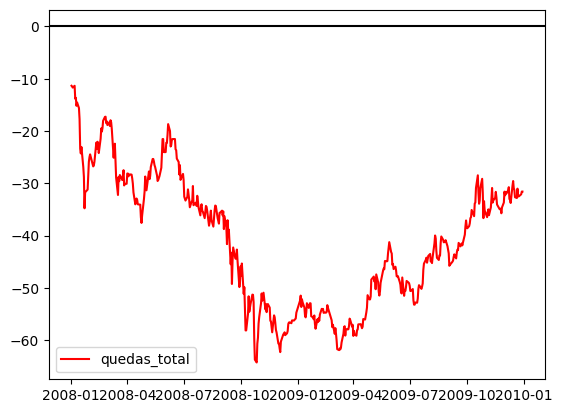

In [176]:
cotacoes_range = cotacoes[(cotacoes.index > '2008-01-01') & (cotacoes.index < '2010-01-01') ]
fig, ax = plt.subplots()
# ax.plot(cotacoes_range['cummax_total'], label = "cummax_total")
ax.plot(cotacoes_range['quedas_total'], label = "quedas_total", color='red')
# ax.plot(cotacoes_range['Adj Close'], label = "Price")

y_max_cot = cotacoes_range['Adj Close'].max()
y_min_quedas = cotacoes['quedas_total'].min()
y_pct_scale = [(y_min_quedas / 4) * (i+1) for i in range(4) ]
y_cot_scale = [(y_max_cot / 4) * (i+1) for i in range(4) ]
y_scale = sorted(y_pct_scale + y_cot_scale )

# ax.set_ylim(0, 4)

y_scale_label =  [str(int(y)) + '%' for y in y_scale[:3]] + [int(y) for y in y_scale[3:]]
print(sorted(y_pct_scale))
print(sorted(y_scale))



ax.legend()
ax.axhline(y = 0, color = 'black')
# ax.set_yscale('log')
# ax.yaxis.set_ticks(y_scale, y_scale_label)

# print(cotacoes)

In [183]:
cot = cotacoes['quedas_total'].dropna().drop_duplicates().to_frame()
cot['rank'] = cot['quedas_total'].rank()
cot.sort_values('rank').head(50)
cot[cot.index.year == 2020].sort_values('rank')

,quedas_total,rank
Date,,
2020-03-18,-46.667726,165.0
2020-03-16,-44.773794,191.0
2020-03-17,-42.214990,242.0
2020-03-19,-42.114232,244.0
2020-03-20,-34.780287,438.0
...,...,...
2020-01-15,-0.311271,3394.0
2020-01-02,-0.282969,3397.0
2020-08-06,-0.171535,3416.0


In [178]:
print(__vsc_ipynb_file__)

c:\Users\Gabriel\Python Dados\Projetos\drawdowns.ipynb
